In [134]:
import nest
import pylab
import numpy
import nest.voltage_trace
from matplotlib import pyplot as plt

possible numeric stability problem in nest. follow up

In [135]:
MGN_params = {
        #'model': 'aeif_cond_exp',
        'E_L': -60.,  # resting membrane potential (mV) - see refs
        'C_m': 150.0,      # membrane capacity (pF)
        'g_L': 10.0,      # leak conductance  - see refs
        'V_reset': -55.,  # reset membrane potential after a spike (mV)  - for burstiness
        'V_th': -50.,  # spike threshold (mV)
        'tau_syn_ex': 2.5, # exc. synaptic time constant  - mit paper
        'tau_syn_in': 10., # exc. synaptic time constant  - mit paper

        "a": 40.,
        "b": 0.,
        'tau_w': 150.,
        'V_m': -60.,
}

TRN_params = {
        #'model': 'aeif_cond_exp',
        'E_L': -60.,  # resting membrane potential (mV) - see refs
        'C_m': 150.0,      # membrane capacity (pF)
        'g_L': 10.0,      # leak conductance  - see refs
        'V_reset': -55.,  # reset membrane potential after a spike (mV)  - for burstiness
        'V_th': -50.,  # spike threshold (mV)
        'tau_syn_ex': 2.5, # exc. synaptic time constant  - mit paper
        'tau_syn_in': 10., # exc. synaptic time constant  - mit paper
        "a": 30.,
        "b": 80.,
        'tau_w': 300.,
        'V_m': -60.,
}   

# according to RS neuron parameters in Destexhe, A. (2009). https://doi.org/10.1007/s10827-009-0164-4
# with "strong adaptation"
neuron_exc_params_aone = {
        #'model': 'aeif_cond_exp',
        "a": 2.,
        "b": 40.,
        'tau_w': 150.,

        'C_m': 150.,
        'g_L': 10.,
        'V_reset': -60.,
        'V_th': -50.,
        'E_L': -70.,
        'V_m': -70.,
}

# according to fast-spiking inh neuron parameters in Destexhe, A. (2009). https://doi.org/10.1007/s10827-009-0164-4
neuron_inh_params_aone = {
        #'model': 'aeif_cond_exp',
        "a": 2.,
        "b": 0.,            # no spike-based adaptation
        'tau_w': 600.,

        'C_m': 150.,
        'g_L': 10.,
        'V_reset': -60.,
        'V_th': -50.,
        'E_L': -70.,  # this is changed
        'V_m': -70.,
}

In [136]:
def oneSpikeEpsp (params, weight):
    nest.ResetKernel()

    n = nest.Create("aeif_cond_exp", 1)
    #nest.SetStatus(n, neuron_params_thl)
    nest.SetStatus(n, params)

    v = nest.Create("voltmeter")
    #mm = nest.Create('multimeter', 1, {'record_from': ['V_m']})
    #nest.SetStatus(mm, {'interval': 0.1})

    nest.Connect(v, n)

    sg = nest.Create('spike_generator')

    nest.SetStatus(sg, {'spike_times' : [200.]})

    nest.Connect(sg, n, syn_spec={'weight':weight})

    nest.Simulate(500)

    nest.voltage_trace.from_device(v)
    #plt.plot(v.events['V_m'][100:])
    
    #print(v.events['V_m'])
    l = v.events['V_m'][194]
    if weight > 0:
        m = max(v.events['V_m'][195:])
    else:
        m = min(v.events['V_m'][195:])
    
    diff = abs(m - l)
    
    print("EPSP: ", str(m), "   Deviation from E_L: ", str(diff))

EPSP:  -69.99552799981893    Deviation from E_L:  0.004392332652429332


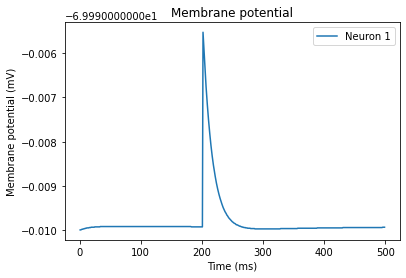

In [137]:
# from MGN to eA1
oneSpikeEpsp(neuron_exc_params_aone, 0.05)

EPSP:  -69.91212438400045    Deviation from E_L:  0.08779594847091232


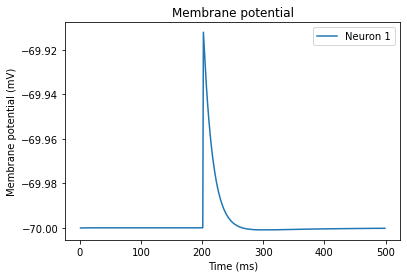

In [138]:
# from eA1 to eA1
oneSpikeEpsp(neuron_exc_params_aone, 1.)

EPSP:  -71.25012687460955    Deviation from E_L:  1.2502065421381872


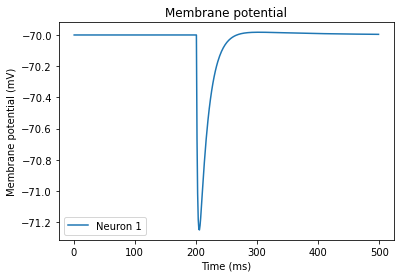

In [139]:
# from iA1 to eA1
oneSpikeEpsp(neuron_exc_params_aone, -9.)

EPSP:  -69.99552095258719    Deviation from E_L:  0.0043925043727313096


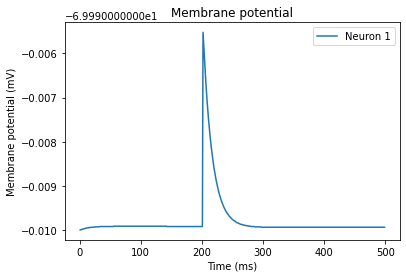

In [140]:
# from MGN to iA1
oneSpikeEpsp(neuron_inh_params_aone, 0.05)

EPSP:  -69.9121154188765    Deviation from E_L:  0.08779803808342024


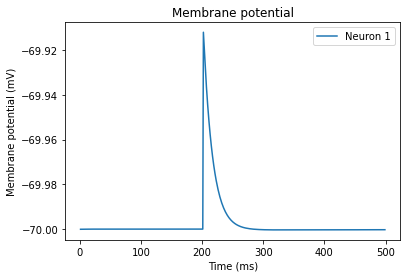

In [141]:
# from eA1 to iA1
oneSpikeEpsp(neuron_inh_params_aone, 1.)

EPSP:  -71.25070244421917    Deviation from E_L:  1.2507889872592557


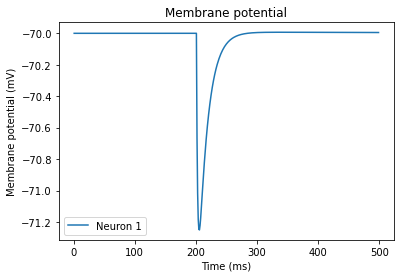

In [142]:
# from iA1 to iA1
oneSpikeEpsp(neuron_inh_params_aone, -9.)

EPSP:  -75.69029217862536    Deviation from E_L:  15.692979224182778


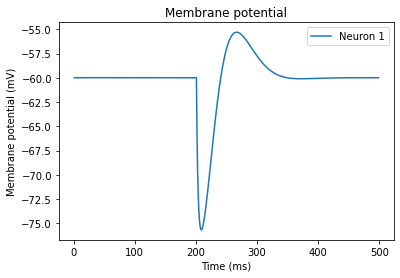

In [143]:
# from TRN to MGN
oneSpikeEpsp(MGN_params, -44.)

EPSP:  -59.96969426301701    Deviation from E_L:  0.027618691425566055


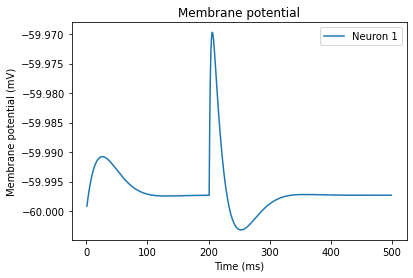

In [144]:
# from eA1 to MGN
oneSpikeEpsp(MGN_params, .04)

EPSP:  -58.48811302296025    Deviation from E_L:  1.5077594687152072


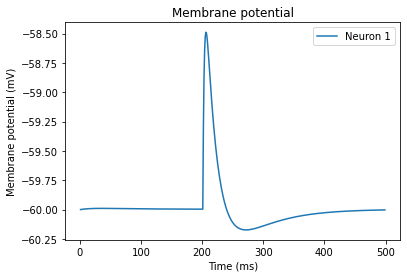

In [145]:
# from MGN to TRN
oneSpikeEpsp(TRN_params, 2.2)

EPSP:  -59.94039862669038    Deviation from E_L:  0.05547386498507478


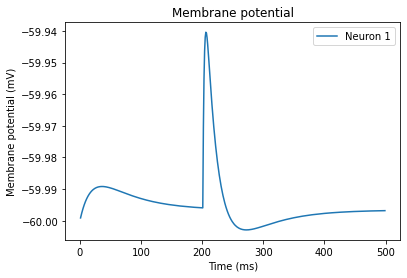

In [146]:
# from eA1 to TRN
oneSpikeEpsp(TRN_params, 0.08)

### Target of 1.0 mV

#### MGN

EPSP:  -58.97183992437671    Deviation from E_L:  1.0254730300658679


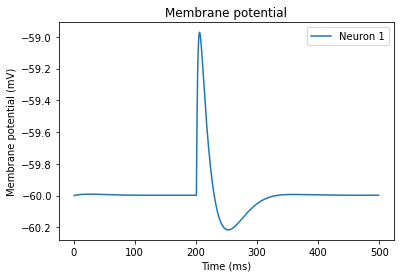

In [163]:
oneSpikeEpsp(MGN_params, 1.5)

#### TRN

EPSP:  -58.96319453608097    Deviation from E_L:  1.0326779555944867


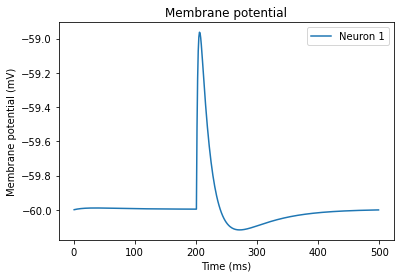

In [162]:
oneSpikeEpsp(TRN_params, 1.5)

#### iA1

EPSP:  -68.95392183811258    Deviation from E_L:  1.0459916188473386


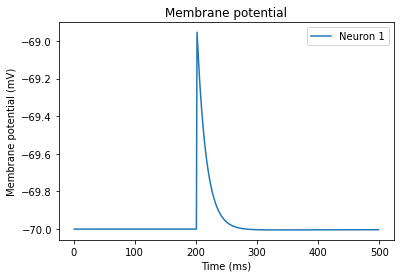

In [164]:
oneSpikeEpsp(neuron_inh_params_aone, 12.)

#### eA1

EPSP:  -68.95395285468747    Deviation from E_L:  1.0459674777838899


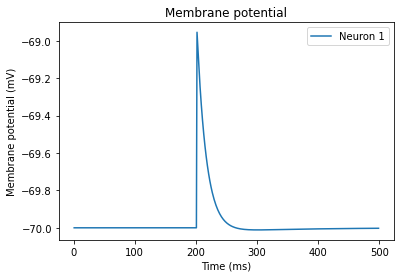

In [150]:
oneSpikeEpsp(neuron_exc_params_aone, 12.)

### Target of 0.5 mV

#### MGN

EPSP:  -59.51623067090561    Deviation from E_L:  0.4810822835369706


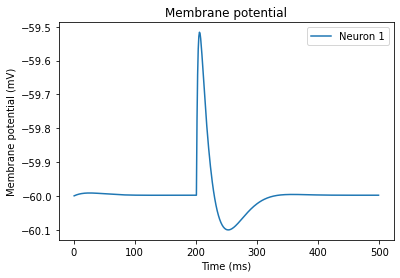

In [165]:
oneSpikeEpsp(MGN_params, .7)

#### TRN

EPSP:  -59.5114835020814    Deviation from E_L:  0.4843889895940592


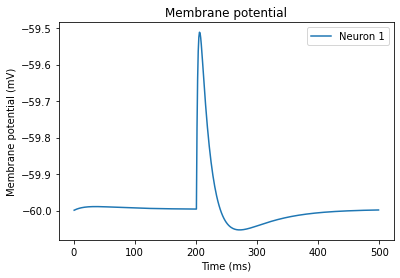

In [173]:
oneSpikeEpsp(TRN_params, .7)

#### iA1

EPSP:  -69.474853261445    Deviation from E_L:  0.5250601955149108


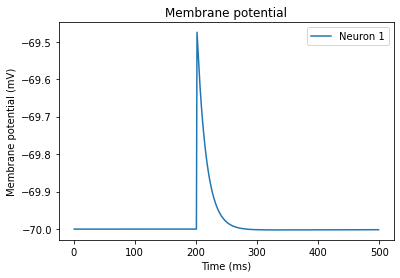

In [174]:
oneSpikeEpsp(neuron_inh_params_aone, 6.)

#### eA1

EPSP:  -69.47487228541188    Deviation from E_L:  0.5250480470594852


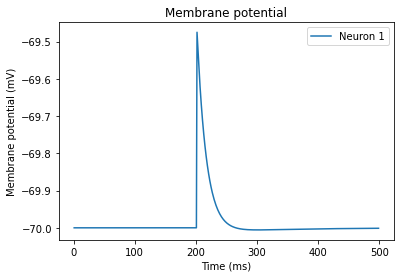

In [168]:
oneSpikeEpsp(neuron_exc_params_aone, 6.)